## Why has there been a shift from "Sunflower" to "Maize"?

### Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from plotnine import *

from interactive import PipeLine

## Generate Animation/Plots

In [4]:
CROP = "MAIZE"
mode = "PRODUCTION (1000 tons)"
cmap = "YlOrBr"
border_color = "tab:orange"

temp = PipeLine(CROP=CROP, mode=mode, cmap=cmap, border_color=border_color)
_, anim_maize, plot_maize_prod = temp.main()

100%|██████████| 52/52 [00:00<00:00, 423.10it/s]


In [8]:
mode = "AREA (1000 ha)"

temp = PipeLine(CROP=CROP, mode=mode, cmap=cmap, border_color=border_color)
_, _, plot_maize_area = temp.main()

100%|██████████| 52/52 [00:00<00:00, 597.09it/s]


In [9]:
mode = "YIELD (Kg per ha)"

temp = PipeLine(CROP=CROP, mode=mode, cmap=cmap, border_color=border_color)
_, _, plot_maize_yield = temp.main()

100%|██████████| 52/52 [00:00<00:00, 622.13it/s]


In [10]:
CROP = "SUNFLOWER"
mode = "PRODUCTION (1000 tons)"
cmap = "YlOrRd"
border_color = "tab:orange"

temp = PipeLine(CROP=CROP, mode=mode, cmap=cmap, border_color=border_color)
_, anim_sunf, plot_sunf_prod = temp.main()

100%|██████████| 52/52 [00:00<00:00, 320.85it/s]


In [11]:
mode = "AREA (1000 ha)"

temp = PipeLine(CROP=CROP, mode=mode, cmap=cmap, border_color=border_color)
_, _, plot_sunf_area = temp.main()

100%|██████████| 52/52 [00:00<00:00, 589.21it/s]


In [12]:
mode = "YIELD (Kg per ha)"

temp = PipeLine(CROP=CROP, mode=mode, cmap=cmap, border_color=border_color)
_, _, plot_sunf_yield = temp.main()

100%|██████████| 52/52 [00:00<00:00, 529.79it/s]


## Maize Production

In [15]:
anim_maize

## Sunflower Production

In [16]:
anim_sunf

## Maize Plots (Production, Area, Yield)

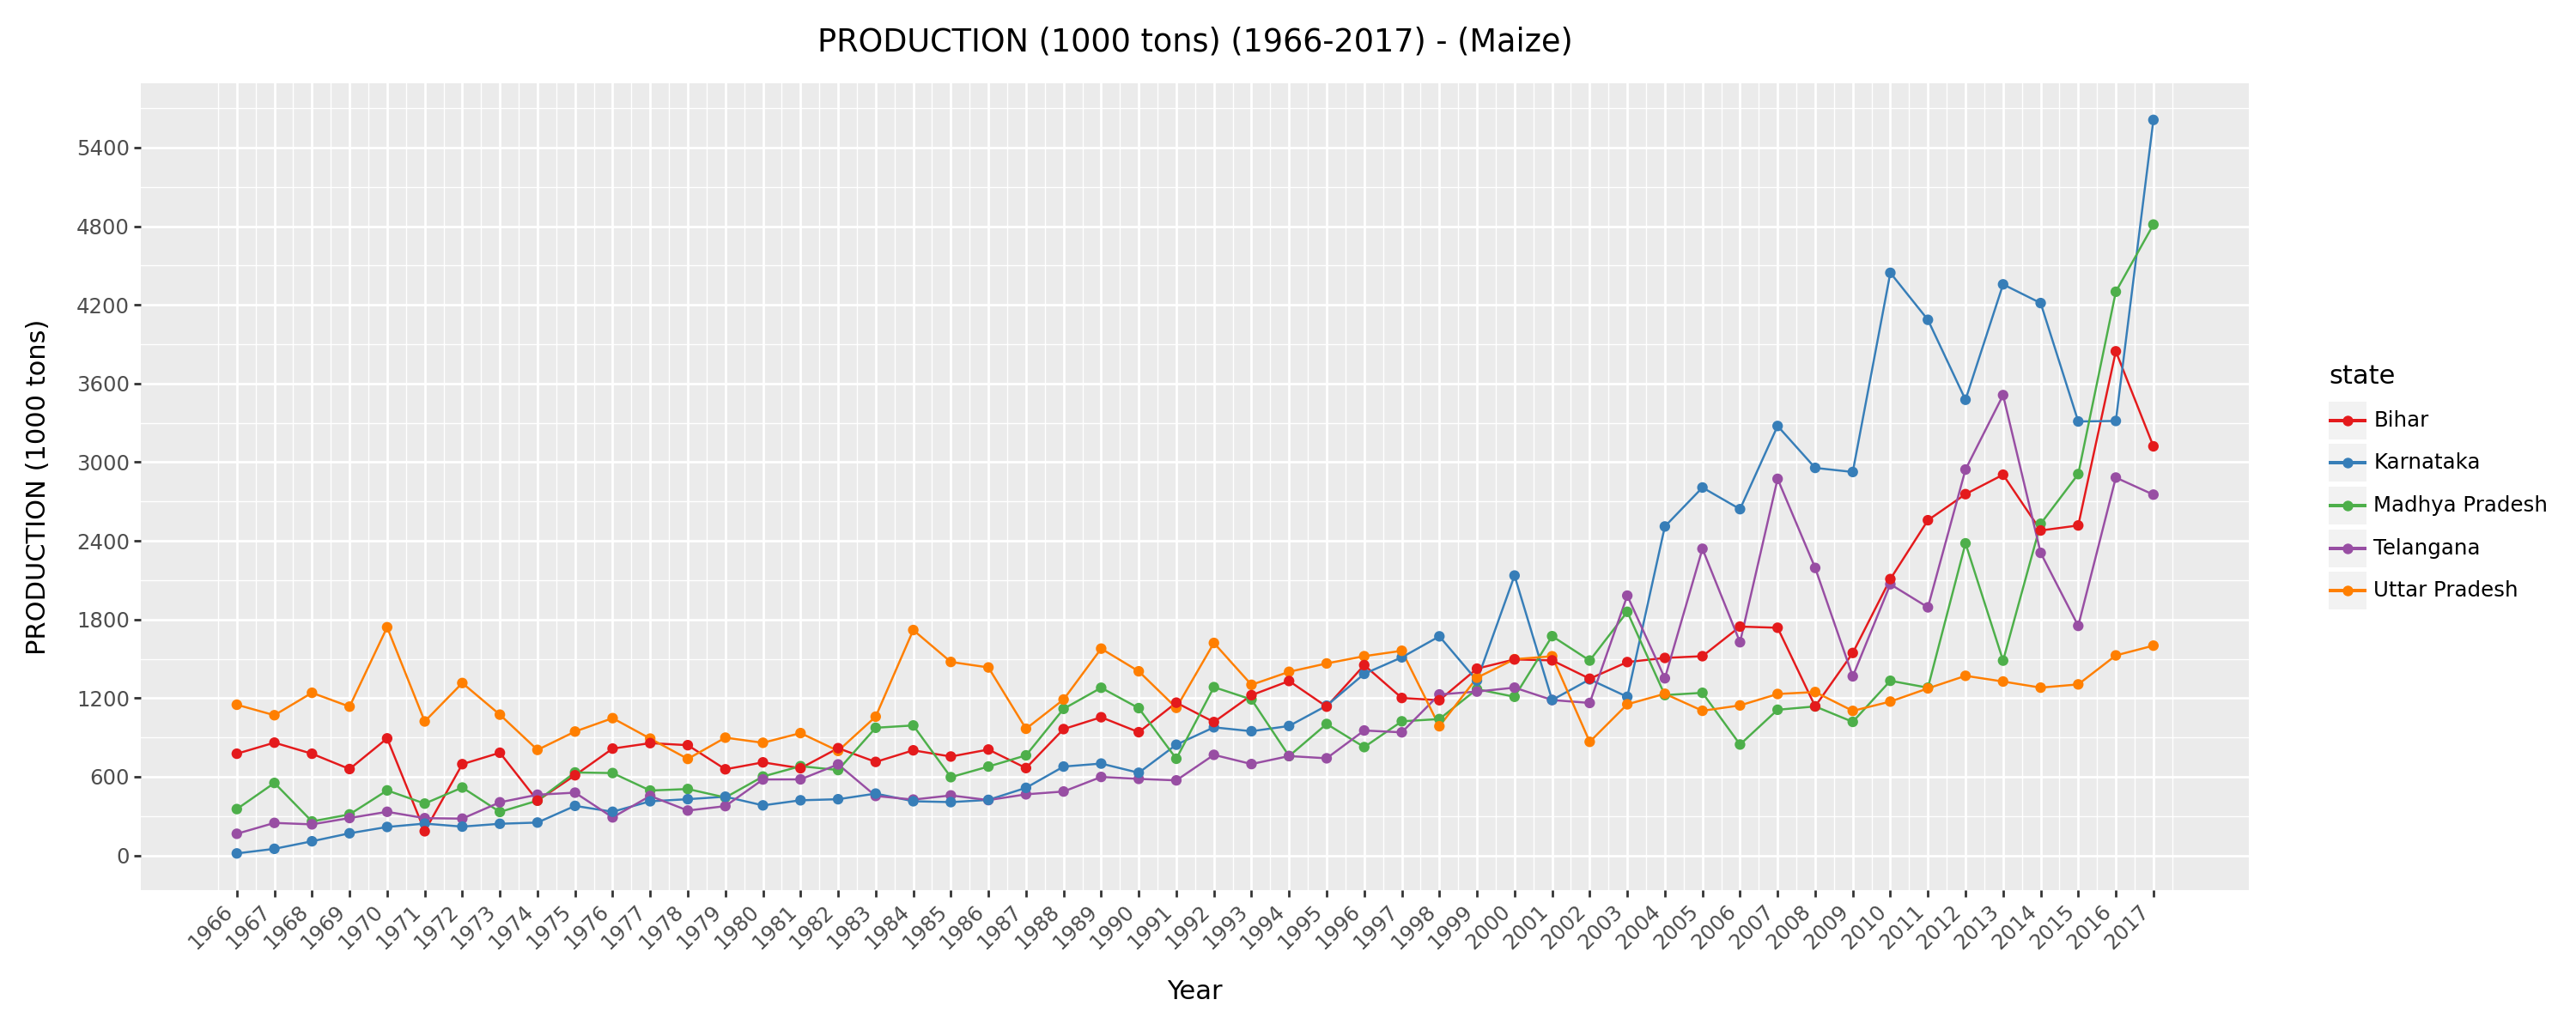

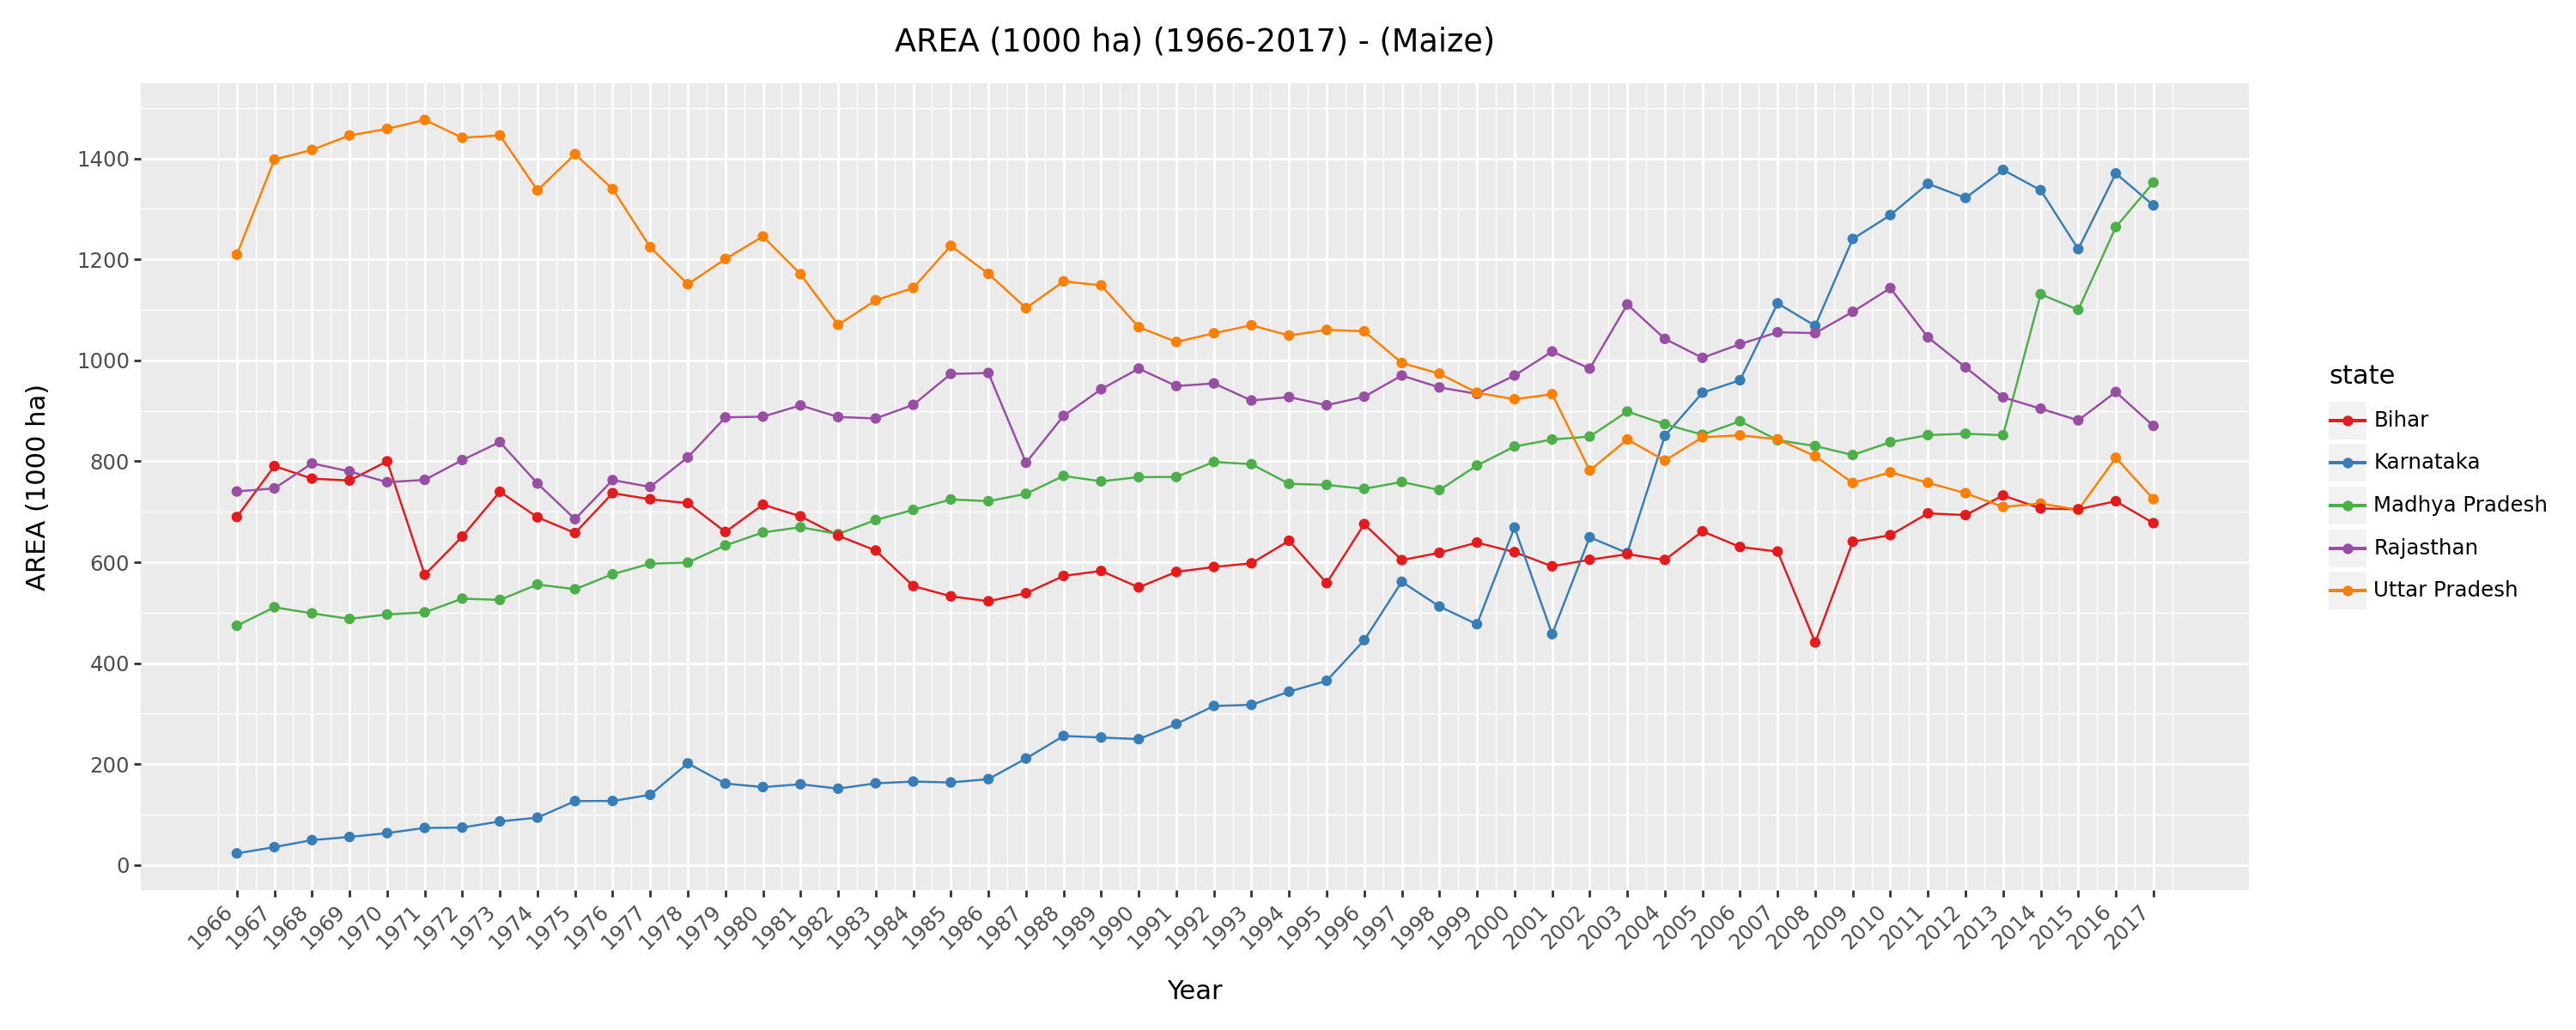

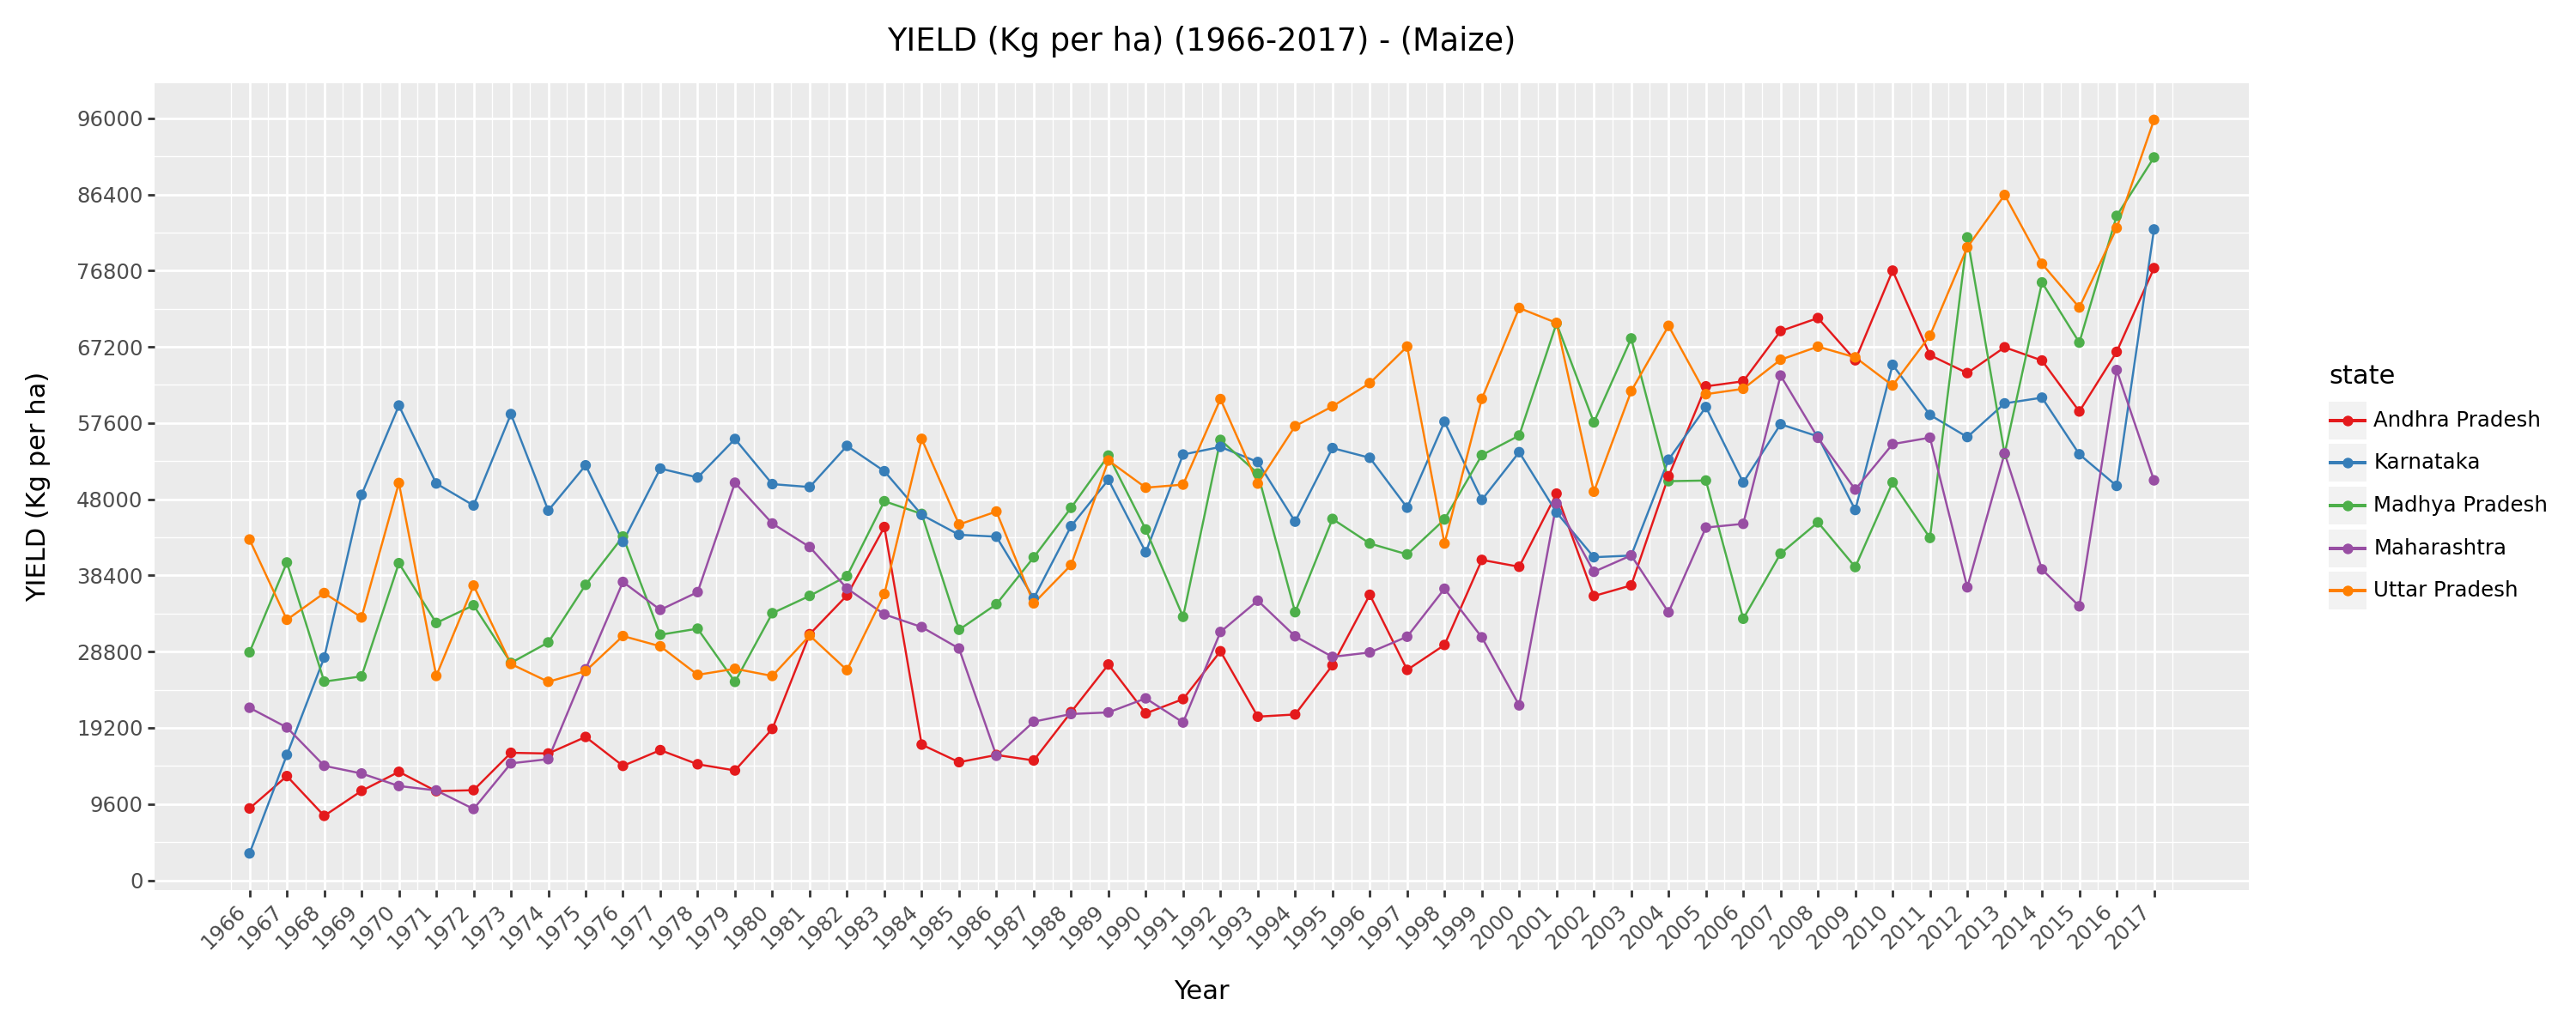

In [13]:
print(plot_maize_prod)
print(plot_maize_area)
print(plot_maize_yield)

## Sunflower Plots (Production, Area, Yield)

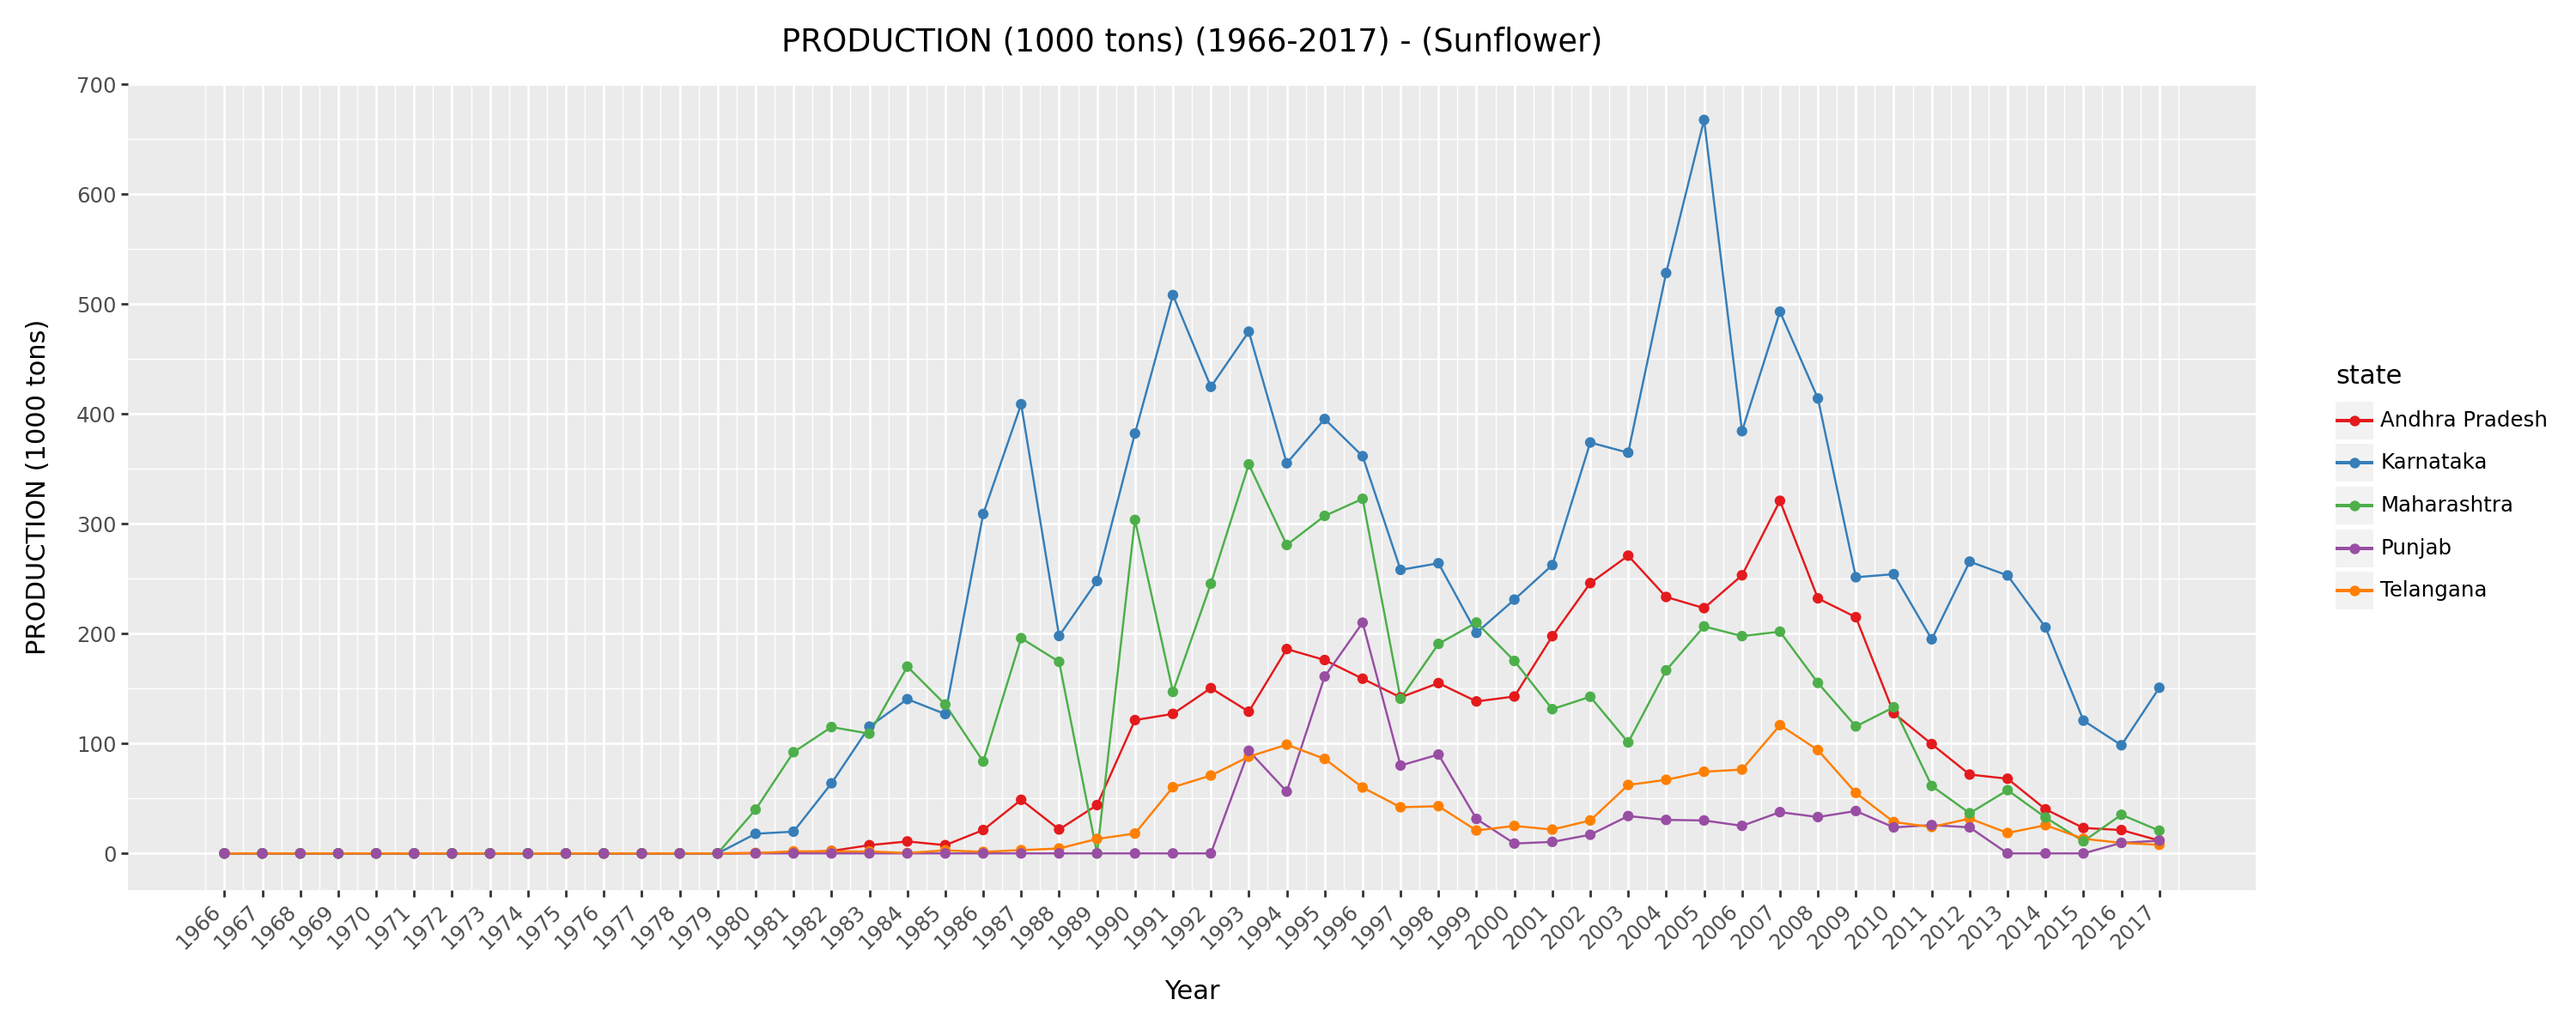

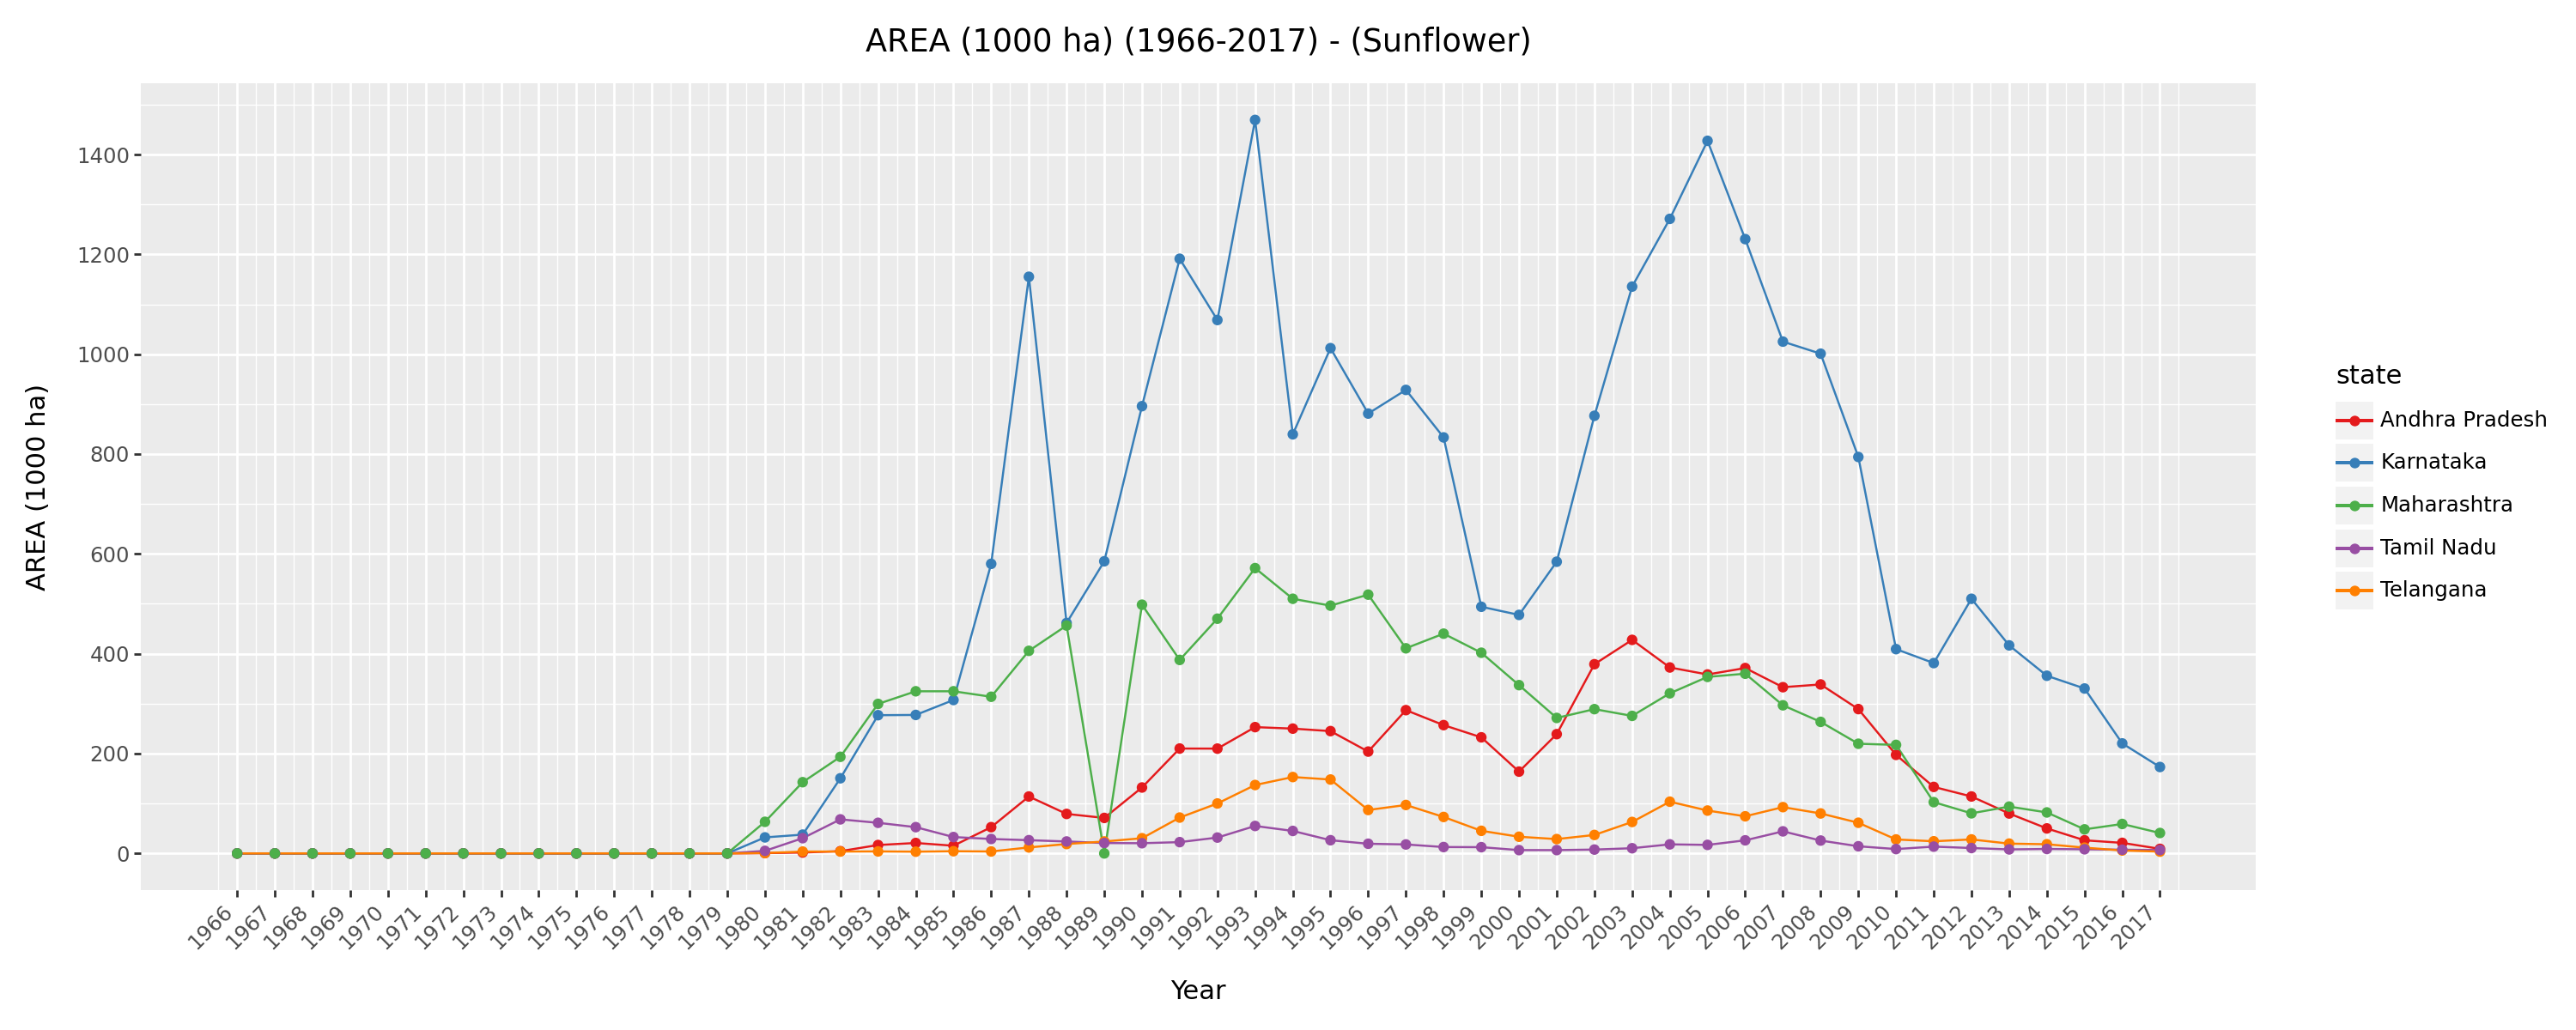

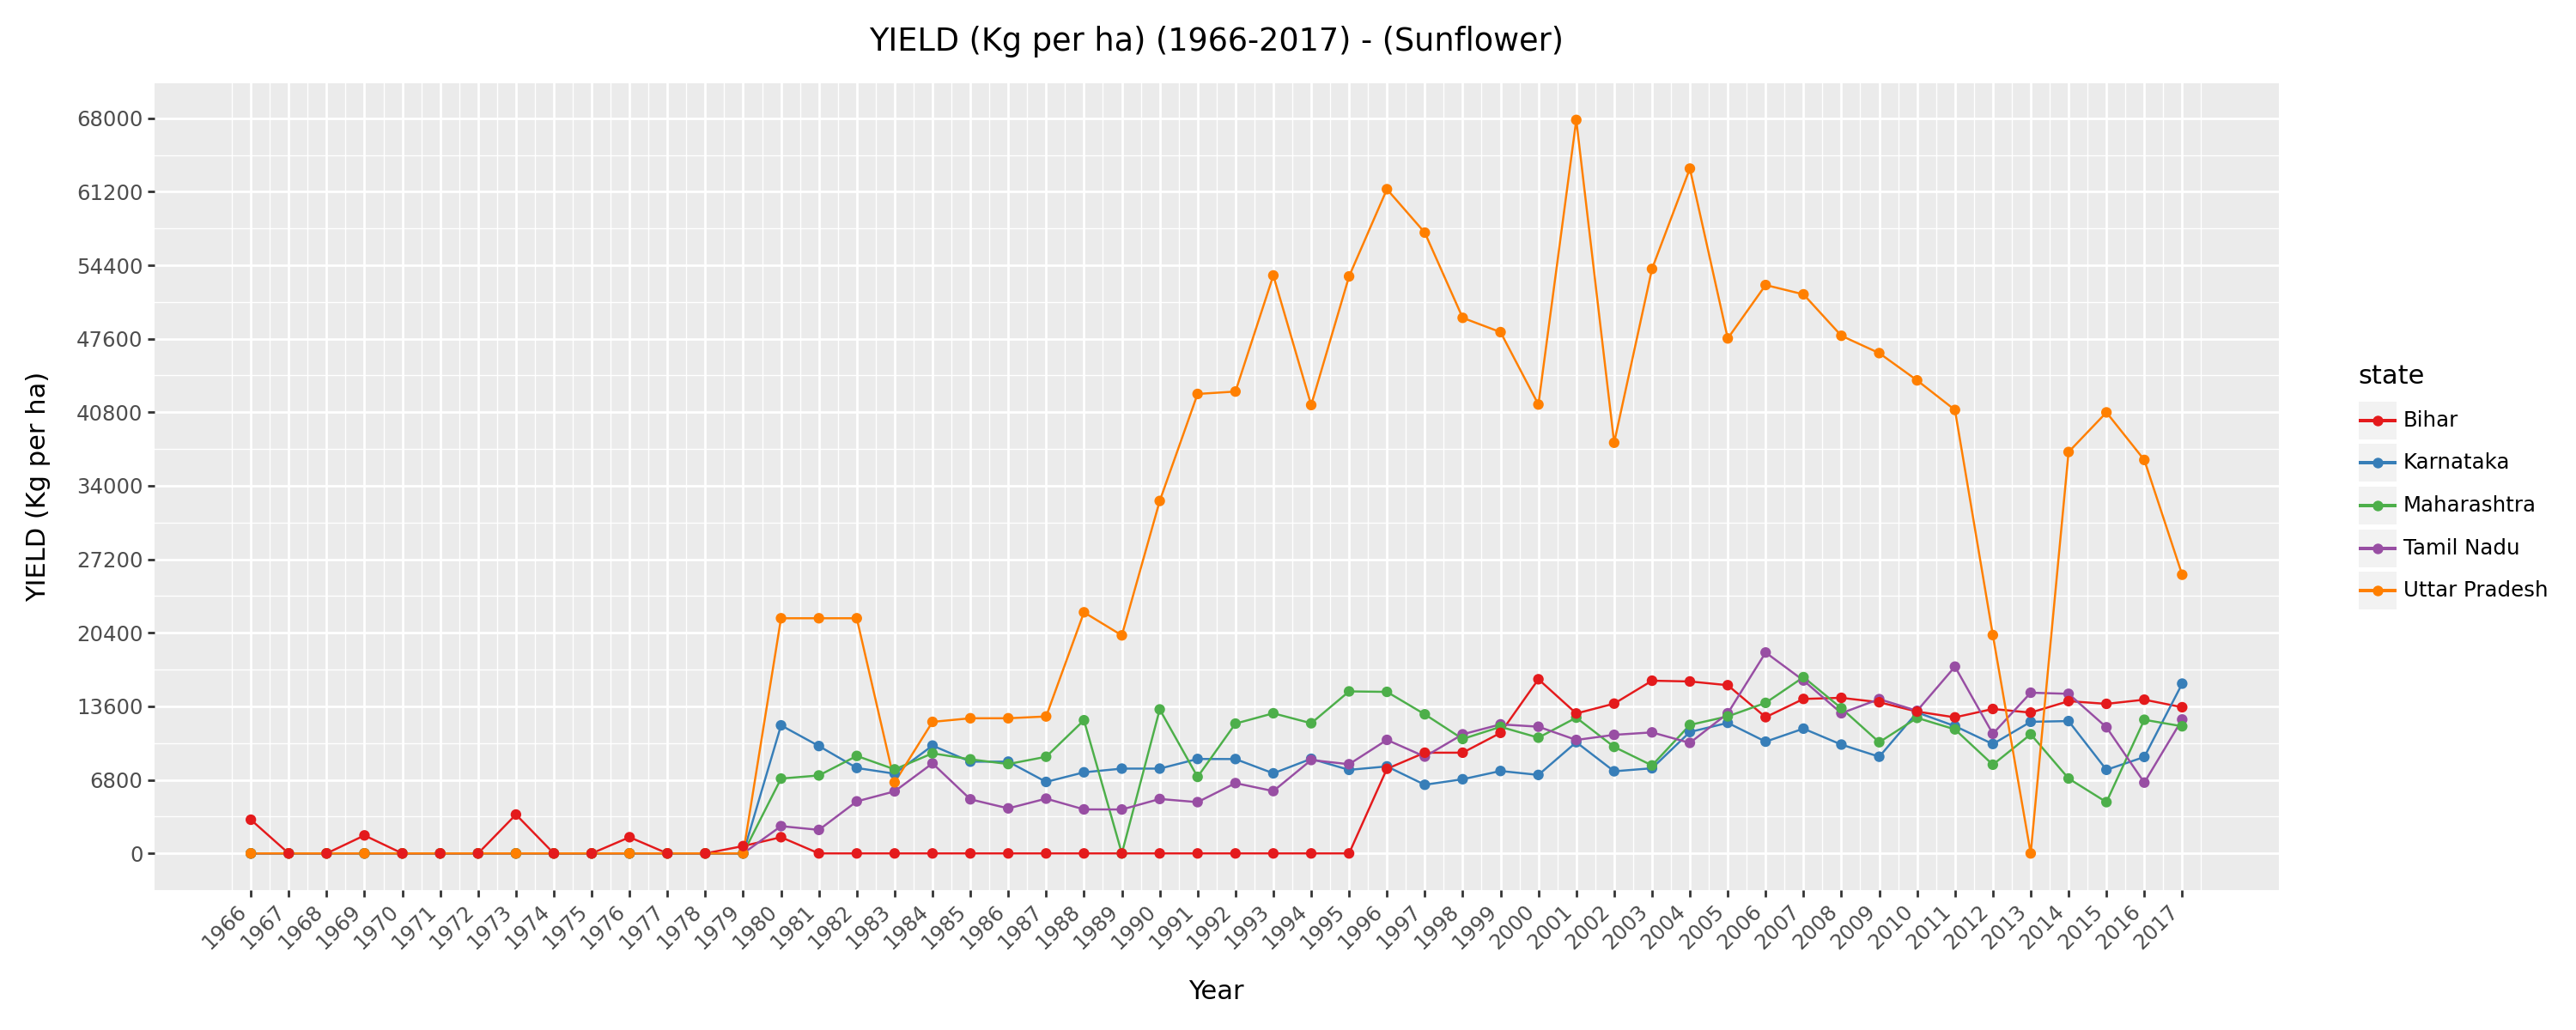

In [14]:
print(plot_sunf_prod)
print(plot_sunf_area)
print(plot_sunf_yield)

## Price Analysis

In [61]:
maize_price = pd.read_csv("data/crops/Maize_2023.csv")
maize_pc = maize_price[(maize_price["state"] == 'Karnataka') & (maize_price["variety"] == "Yellow")].groupby("arrival_date")["modal_price"].mean()
maize_pc.index = pd.to_datetime(maize_pc.index, format='%d/%m/%Y')
maize_pc = maize_pc.sort_index()

In [62]:
maize_pc_df = pd.DataFrame()
maize_pc_df["dates"] = maize_pc.keys()
maize_pc_df["values"] = maize_pc.values

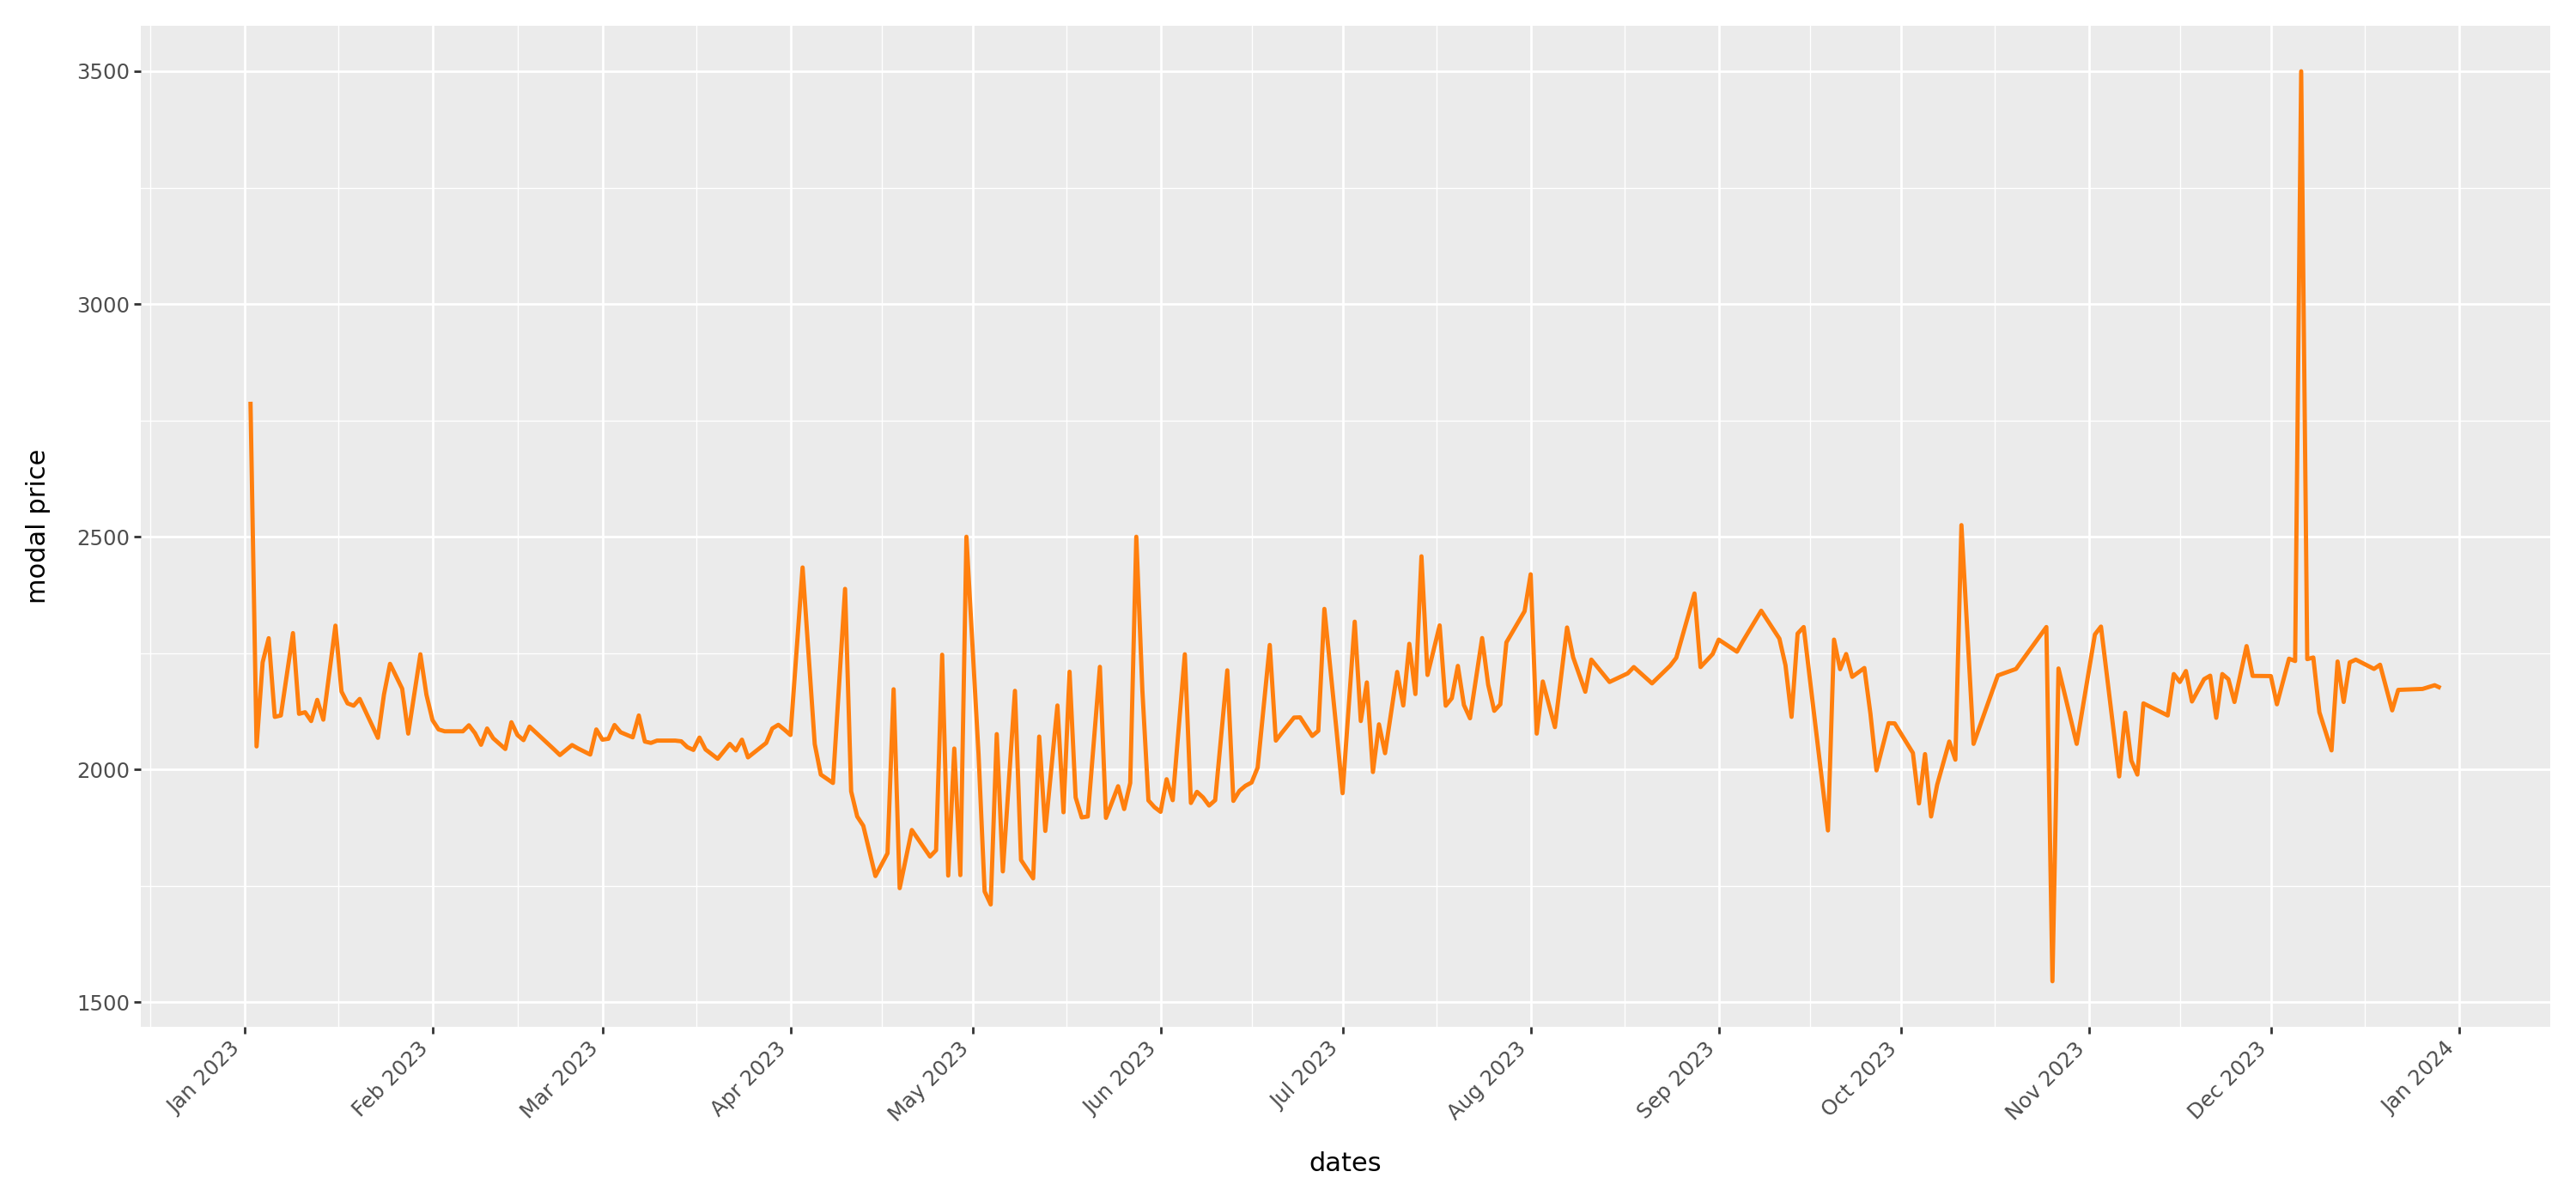

In [75]:
maize_pc_keys_str = [str(key) for key in maize_pc.keys()]

(ggplot(maize_pc_df, aes(x="dates", y="values")) +
    geom_line(size=1.0, color="tab:orange") +
    scale_x_datetime(date_breaks="1 month", date_labels="%b %Y") +
    theme(axis_text_x=element_text(rotation=45, hjust=1)) +
    theme(figure_size=(15, 7)) +
    labs(y="modal price")
)

In [76]:
sunf_price = pd.read_csv("data/crops/Sunflower_2023.csv")
sunf_pc = sunf_price[(sunf_price["state"] == 'Karnataka') & (sunf_price["variety"] == "Sunflower")].groupby("arrival_date")["modal_price"].mean()
sunf_pc.index = pd.to_datetime(sunf_pc.index, format='%d/%m/%Y')
sunf_pc = sunf_pc.sort_index()

In [77]:
sunf_pc_df = pd.DataFrame()
sunf_pc_df["dates"] = sunf_pc.keys()
sunf_pc_df["values"] = sunf_pc.values

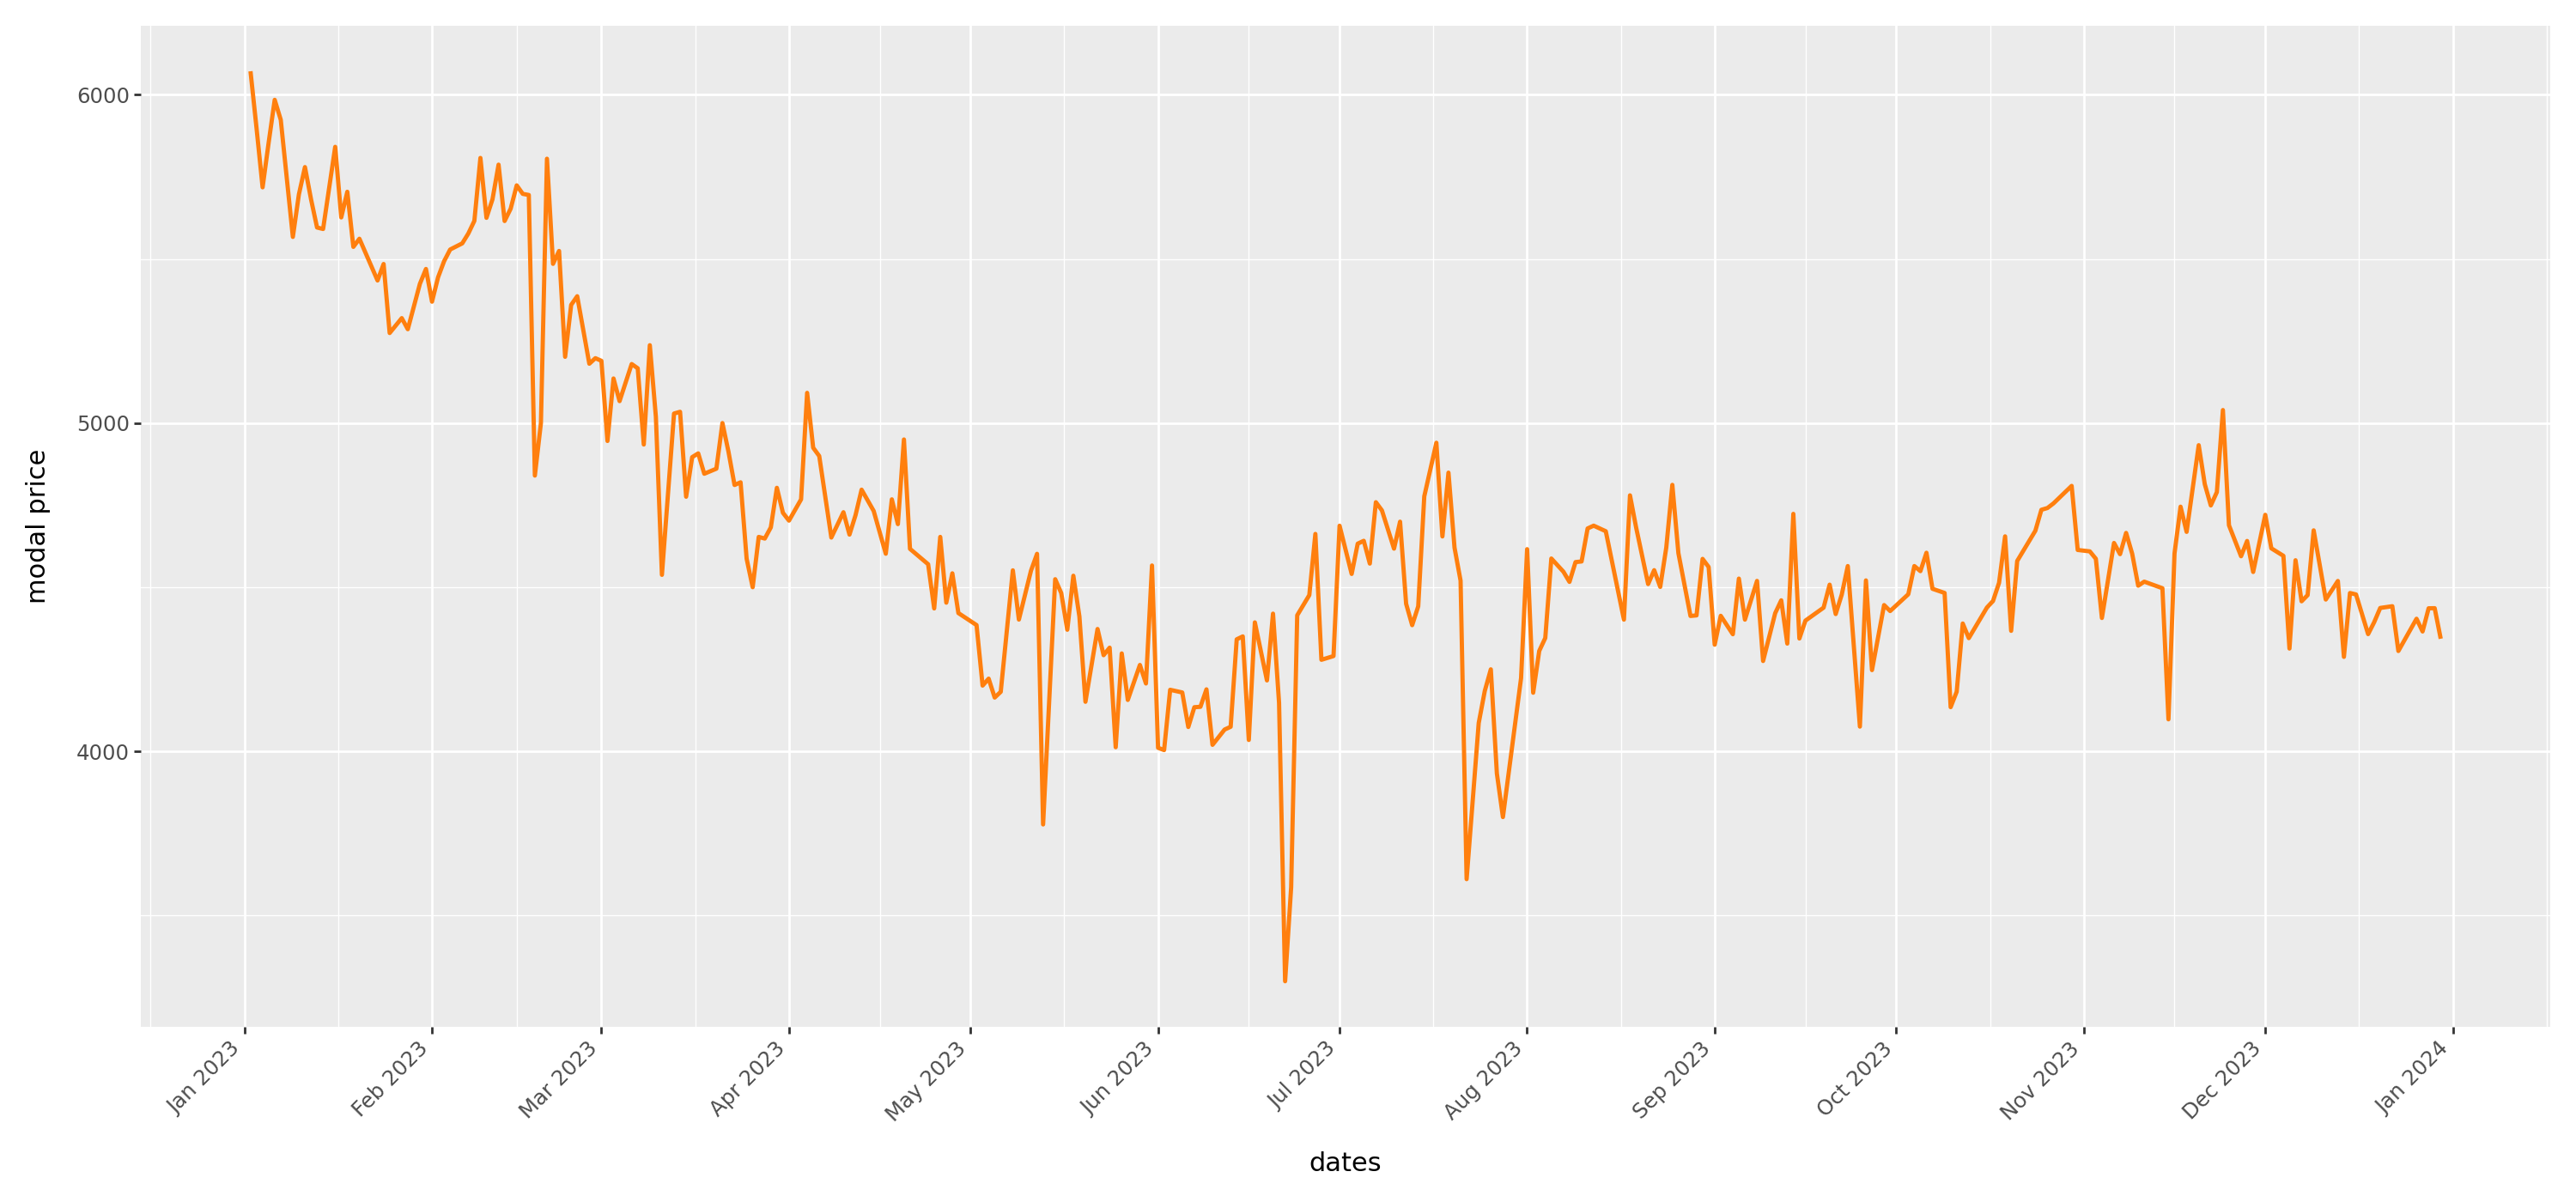

In [78]:
sunf_pc_keys_str = [str(key) for key in sunf_pc.keys()]

(ggplot(sunf_pc_df, aes(x="dates", y="values")) +
    geom_line(size=1.0, color="tab:orange") +
    scale_x_datetime(date_breaks="1 month", date_labels="%b %Y") +
    theme(axis_text_x=element_text(rotation=45, hjust=1)) +
    theme(figure_size=(15, 7)) +
    labs(y="modal price")
)

In [83]:
print("Approximate gross revenue from maize :", (maize_pc.values.mean() * 4200).round(2))
print("Approximate gross revenue from sunflower :", (sunf_pc.values.mean() * 600).round(2))

Approximate gross revenue from maize : 8886041.57
Approximate gross revenue from sunflower : 2816111.96
